# k-evolution test notebook - implementing IC from class

In [21]:
import numpy as np
# import MAS_library as MASL
# import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt
import pandas as pd
# import h5py as h5
import matplotlib.pyplot as plt
text_size=26
fig_size_x=24
fig_size_y=14
from collections import defaultdict

import seaborn as sns
Colors = sns.color_palette("colorblind", 30).as_hex()
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import interpolate
import scipy.signal as sig
# from scipy.ndimage import gaussian_filter1

# Data loading

In [22]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(5, list)
# data_test = nested_dict(5, list)


def correct_label(name):
    return(name.replace("_",", "))
        

In [23]:
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
Boxsize=320.;
c_gev=2997.92458; #[100km/s]
H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
# print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a

In [27]:
redshifts = [100, 50, 30,20, 10, 9, 8, 7, 6 , 5, 4, 3, 2.5, 2, 1.5, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0]
address = "./..//output"

types = 'kev_hiclass'
for kind in ['phi','delta', 'B', 'pi_k', 'zeta', 'delta_kess']:
       
    data[types]['bg'] =np.loadtxt(address+"/file_background.dat")
    for i in range(np.shape(redshifts)[0]):
        z = str(redshifts[i])
        data[types][kind][z] = np.loadtxt(address+"/pk_"+str(i).zfill(3)+"_"+kind+".dat")

#########        
# hiclass        
#########
address_h = "./../../hi_class_pub_devel/output/"
data['hiclass']['bg'] = np.loadtxt(address_h+"kessence_power00_background.dat")

for i in range(np.shape(redshifts)[0]):
    z = str(redshifts[i]);
    data['hiclass']["tk"][z] = np.loadtxt(address_h+"kessence_power00_z"+str(i+1)+"_tk.dat")
    data['hiclass']["pk"][z] = np.loadtxt(address_h+"kessence_power00_z"+str(i+1)+"_pk.dat")

    


# Background tests

In [28]:
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a

def Hubble_prime_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return -(H0**2/2.)*(Omega_m*(a**-1) + 2. * Omega_rad*(a**-2) + (1.+3. * w)*Omega_kessence *(a**(-1.-3.*w)))


### Set speed:



## $\tau(z)$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
No handles with labels found to put in legend.


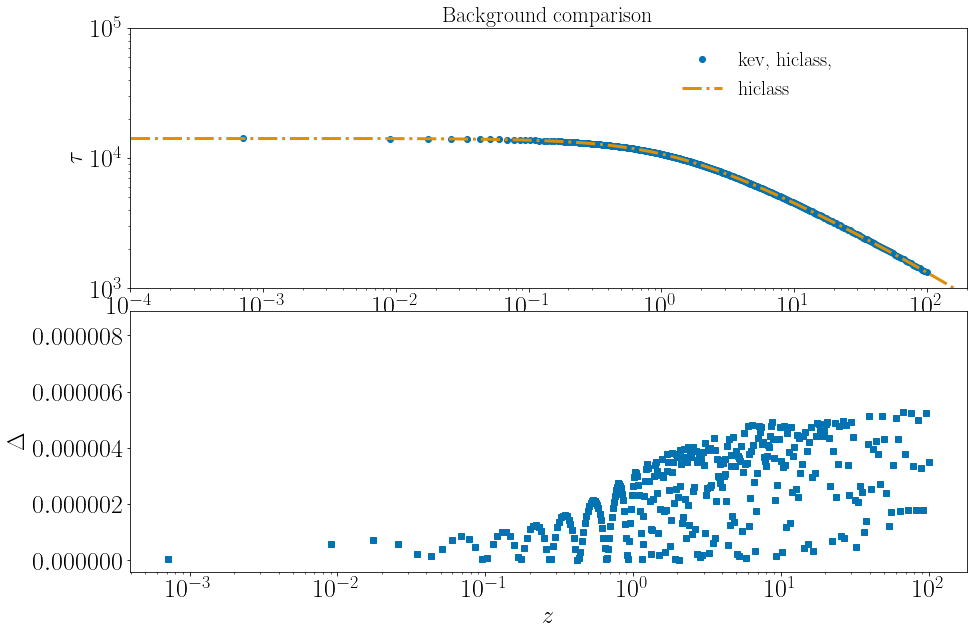

In [29]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,10),nrows=2, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0

###
lines=["s","o","*"]
l=0

# kev
box = 400.0;
file = data['kev_hiclass']['bg']
axs[0].loglog(1./file[:,2]-1.,file[:,1]*box/h,"o",color =Colors[l], lw=3,label=correct_label(types +", "))

f = interpolate.interp1d(file[:,2],file[:,1])
f_h = data['hiclass']['bg']
axs[0].loglog(f_h[:,0],f_h[:,2],"-.",color =Colors[l+1], lw=3,label="hiclass")


l=l+1

axs[0].set_ylabel(r'$\tau$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(1.e3,1.e5)
axs[0].set_xlim(0,200)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs[0].set_title("Background comparison", fontsize=22)
axs[0].legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


l=0
# hiclass 
f_h = data['hiclass']['bg']
f = interpolate.interp1d(f_h[:,0],f_h[:,2],fill_value='extrapolate')
# kevolution
file = data['kev_hiclass']['bg']
file_based = file[:,1]*box/h
z_s= 1./file[:,2]-1;
axs[1].plot(z_s,np.abs(f(z_s)/file_based-1.),lines[l],color =Colors[l], lw=3)


axs[1].set_ylabel(r'$\Delta$',fontsize=24)
axs[1].set_xlabel('$z$',fontsize=24)
axs[1].set_xscale('log')
# axs[1].set_yscale('log')
# axs[1].set_ylim(-0.01,0.01)
# axs[1].set_xlim(1.e-2,2.e0)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[1].set_title("Background comparison", fontsize=22)
axs[1].legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


## $\mathcal{H}(z)$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
No handles with labels found to put in legend.


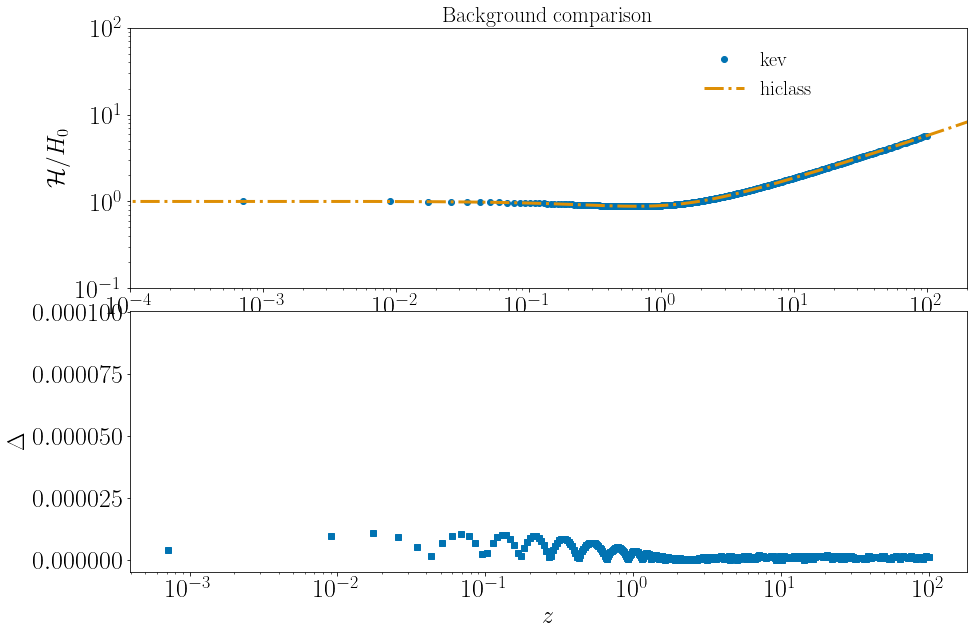

In [30]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,10),nrows=2, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0

###
lines=["s","o","*"]
l=0

# kev
box = 400.0;
file = data['kev_hiclass']['bg']
axs[0].loglog(1./file[:,2]-1.,file[:,3],"o",color =Colors[l], lw=3,label="kev")

f = interpolate.interp1d(file[:,2],file[:,1])
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
axs[0].loglog(f_h[:,0],f_h[:,3]*a_h/f_h[-1:,3],"-.",color =Colors[l+1], lw=3,label="hiclass")


l=l+1

axs[0].set_ylabel(r'$\mathcal{H}/H_0$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(0.1,1.e2)
axs[0].set_xlim(0,200)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs[0].set_title("Background comparison", fontsize=22)
axs[0].legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


l=0
# hiclass 
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
f = interpolate.interp1d(f_h[:,0],f_h[:,3]*a_h/f_h[-1:,3],fill_value='extrapolate')
# kevolution
file = data['kev_hiclass']['bg']
file_based = file[:,3]
z_s= 1./file[:,2]-1;
axs[1].plot(z_s,np.abs(f(z_s)/file_based-1.),lines[l],color =Colors[l], lw=3)


axs[1].set_ylabel(r'$\Delta$',fontsize=24)
axs[1].set_xlabel('$z$',fontsize=24)
axs[1].set_xscale('log')
# axs[1].set_yscale('log')
# axs[1].set_ylim(-0.01,0.01)
# axs[1].set_xlim(1.e-2,2.e0)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[1].set_title("Background comparison", fontsize=22)
axs[1].legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


## $\mathcal{H}'/H_0^2$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
No handles with labels found to put in legend.


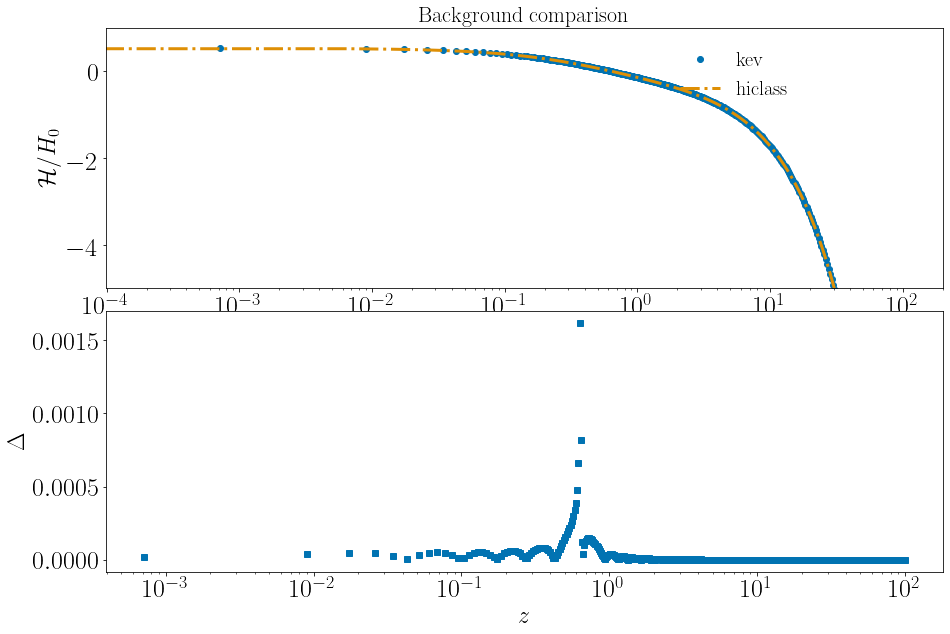

In [31]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,10),nrows=2, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0

###
lines=["s","o","*"]
l=0

# kev
box = 400.0;
file = data['kev_hiclass']['bg']
axs[0].plot(1./file[:,2]-1.,file[:,4],"o",color =Colors[l], lw=3,label="kev")

# f = interpolate.interp1d(file[:,2],file[:,1])
## dH/dτ =dℋ/dτ/a - ℋ^2/a
#dℋ/dτ = a(dH/dτ[hiclass output]) + ℋ) (hiclass output))
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
axs[0].plot(f_h[:,0],(a_h*f_h[:,4]+f_h[:,3]**2*a_h**2)/f_h[-1:,3]/f_h[-1:,3],"-.",color =Colors[l+1], lw=3,label="hiclass")


l=l+1

axs[0].set_ylabel(r'$\mathcal{H}/H_0$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
# axs[0].set_yscale('log')
axs[0].set_ylim(-5,1)
axs[0].set_xlim(0,200)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs[0].set_title("Background comparison", fontsize=22)
axs[0].legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


l=0
# hiclass 
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
f = interpolate.interp1d(f_h[:,0],(a_h*f_h[:,4]+f_h[:,3]**2*a_h**2)/f_h[-1:,3]/f_h[-1:,3],fill_value='extrapolate')
# kevolution
file = data['kev_hiclass']['bg']
file_based = file[:,4]
z_s= 1./file[:,2]-1;
axs[1].plot(z_s,np.abs(f(z_s)/file_based-1.),lines[l],color =Colors[l], lw=3)


axs[1].set_ylabel(r'$\Delta$',fontsize=24)
axs[1].set_xlabel('$z$',fontsize=24)
axs[1].set_xscale('log')
# axs[1].set_yscale('log')
# axs[1].set_ylim(-0.01,0.01)
# axs[1].set_xlim(1.e-2,2.e0)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[1].set_title("Background comparison", fontsize=22)
axs[1].legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


## $c_s^2$

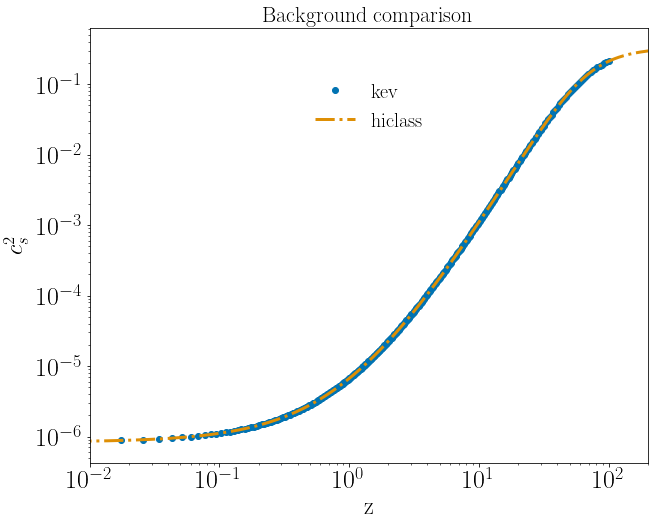

In [32]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0

###
types = 'kev_class'
lines=["s","o","*"]
l=0
# for types in ['kev_hiclass','kev_class', 'kev_file']:

ffile = data['kev_hiclass']['bg']
axs.plot(1./file[:,2]-1.,file[:,6],"o",color =Colors[l], lw=3,label="kev")

# f = interpolate.interp1d(file[:,2],file[:,1])
## dH/dτ =dℋ/dτ/a - ℋ^2/a
#dℋ/dτ = a(dH/dτ[hiclass output]) + ℋ) (hiclass output))
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
axs.plot(f_h[:,0],f_h[:,29],"-.",color =Colors[l+1], lw=3,label="hiclass")

axs.set_ylabel(r"$c_s^2$",fontsize=24)
axs.set_xlabel('z',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
# axs.set_ylim(-100,1.2)
axs.set_xlim(1.e-2,2.e2)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.5,0.82],loc="center",frameon=False)


## $s= (c_s^2)'/\mathcal{H} c_s^2$

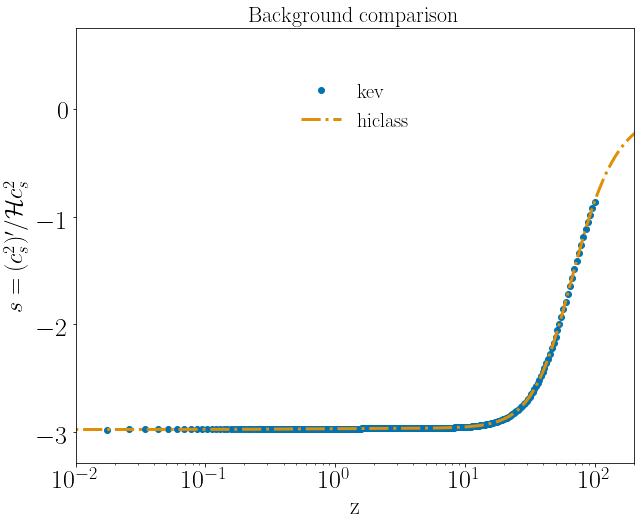

In [33]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0

###
types = 'kev_class'
lines=["s","o","*"]
l=0
# for types in ['kev_hiclass','kev_class', 'kev_file']:

ffile = data['kev_hiclass']['bg']
axs.plot(1./file[:,2]-1.,file[:,7],"o",color =Colors[l], lw=3,label="kev")

# f = interpolate.interp1d(file[:,2],file[:,1])
## dH/dτ =dℋ/dτ/a - ℋ^2/a
#dℋ/dτ = a(dH/dτ[hiclass output]) + ℋ) (hiclass output))
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
axs.plot(f_h[:,0],f_h[:,30]/f_h[:,29]/(a_h*f_h[:,3]),"-.",color =Colors[l+1], lw=3,label="hiclass")

axs.set_ylabel(r"$s = (c_s^2)'/\mathcal{H} c_s^2$",fontsize=24)
axs.set_xlabel('z',fontsize=24)
axs.set_xscale('log')
# axs.set_yscale('log')
# axs.set_ylim(-100,1.2)
axs.set_xlim(1.e-2,2.e2)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.5,0.82],loc="center",frameon=False)


## $\Omega_{smg}$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


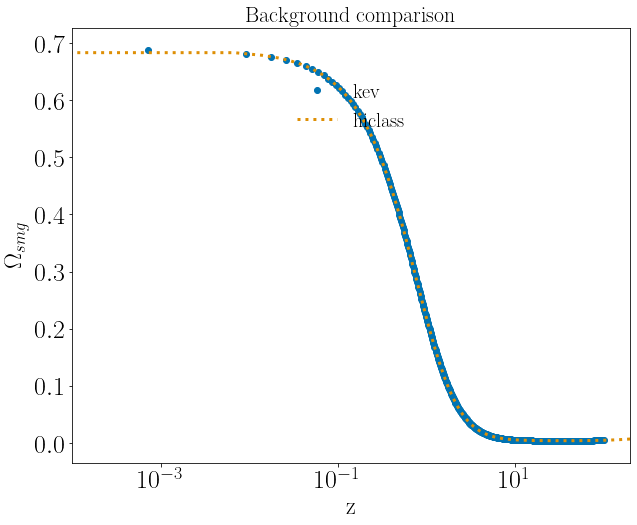

In [34]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0

###
types = 'kev_class'
lines=["s","o","*"]
l=0
# for types in ['kev_hiclass','kev_class', 'kev_file']:

ffile = data['kev_hiclass']['bg']
axs.plot(1./file[:,2]-1.,file[:,13],"o",color =Colors[l], lw=3,label="kev")

# f = interpolate.interp1d(file[:,2],file[:,1])
## dH/dτ =dℋ/dτ/a - ℋ^2/a
#dℋ/dτ = a(dH/dτ[hiclass output]) + ℋ) (hiclass output))
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
axs.plot(f_h[:,0],f_h[:,19]/f_h[:,13],":",color =Colors[l+1], lw=3,label="hiclass")

axs.set_ylabel(r"$\Omega_{smg}$",fontsize=24)
axs.set_xlabel('z',fontsize=24)
axs.set_xscale('log')
# axs.set_yscale('log')
# axs.set_ylim(-100,1.2)
axs.set_xlim(0,2.e2)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.5,0.82],loc="center",frameon=False)


## $c_a^2 = p'/\rho'$

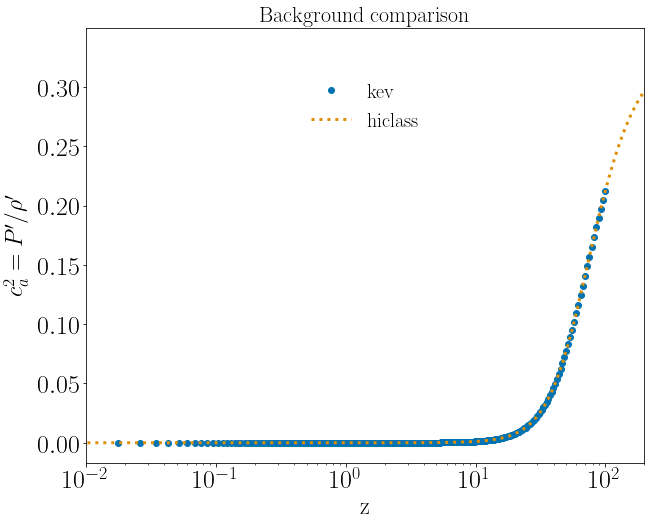

In [35]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0

###
types = 'kev_class'
lines=["s","o","*"]
l=0
# for types in ['kev_hiclass','kev_class', 'kev_file']:

ffile = data['kev_hiclass']['bg']
axs.plot(1./file[:,2]-1.,file[:,8],"o",color =Colors[l], lw=3,label="kev")

# f = interpolate.interp1d(file[:,2],file[:,1])
## dH/dτ =dℋ/dτ/a - ℋ^2/a
#dℋ/dτ = a(dH/dτ[hiclass output]) + ℋ) (hiclass output))
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
axs.plot(f_h[:,0],f_h[:,22]/f_h[:,21],":",color =Colors[l+1], lw=3,label="hiclass")

axs.set_ylabel(r"$c_a^2 = P'/\rho'$",fontsize=24)
axs.set_xlabel('z',fontsize=24)
axs.set_xscale('log')
# axs.set_yscale('log')
# axs.set_ylim(-100,1.2)
axs.set_xlim(1.e-2,2.e2)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.5,0.82],loc="center",frameon=False)


## $w' = -3 \mathcal{H} (1+w) (c_a^2 -w)$

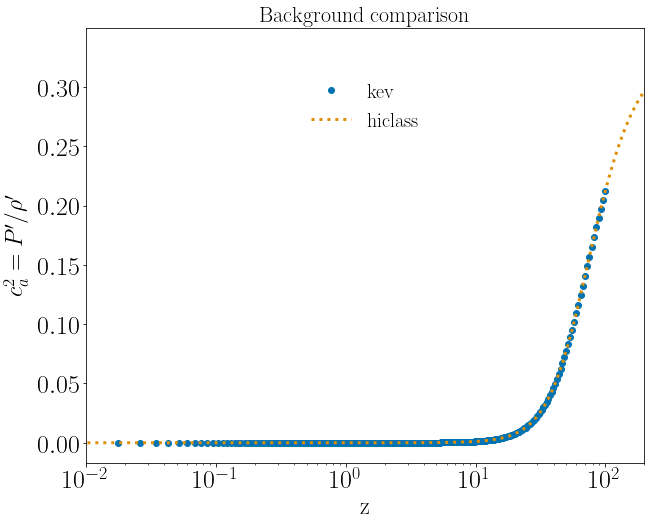

In [36]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0

###
types = 'kev_class'
lines=["s","o","*"]
l=0
# for types in ['kev_hiclass','kev_class', 'kev_file']:

ffile = data['kev_hiclass']['bg']
axs.plot(1./file[:,2]-1.,file[:,8],"o",color =Colors[l], lw=3,label="kev")

# f = interpolate.interp1d(file[:,2],file[:,1])
## dH/dτ =dℋ/dτ/a - ℋ^2/a
#dℋ/dτ = a(dH/dτ[hiclass output]) + ℋ) (hiclass output))
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
axs.plot(f_h[:,0],f_h[:,22]/f_h[:,21],":",color =Colors[l+1], lw=3,label="hiclass")

axs.set_ylabel(r"$c_a^2 = P'/\rho'$",fontsize=24)
axs.set_xlabel('z',fontsize=24)
axs.set_xscale('log')
# axs.set_yscale('log')
# axs.set_ylim(-100,1.2)
axs.set_xlim(1.e-2,2.e2)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.5,0.82],loc="center",frameon=False)


## $w = P/\rho$

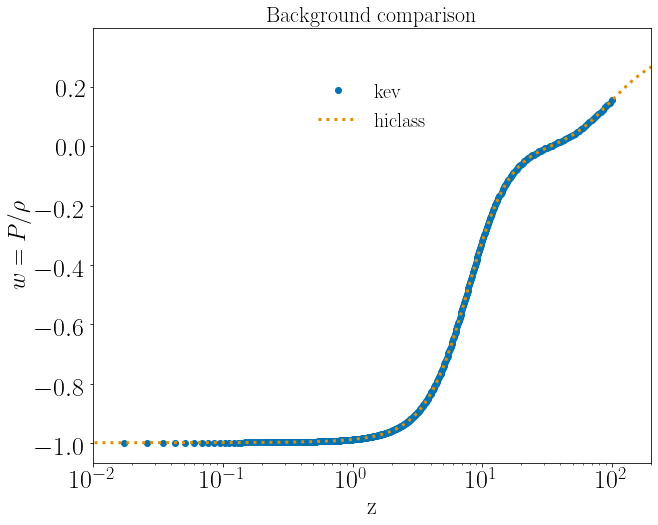

In [37]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0

###
types = 'kev_class'
lines=["s","o","*"]
l=0
# for types in ['kev_hiclass','kev_class', 'kev_file']:

ffile = data['kev_hiclass']['bg']
axs.plot(1./file[:,2]-1.,file[:,10]/file[:,9],"o",color =Colors[l], lw=3,label="kev")

# f = interpolate.interp1d(file[:,2],file[:,1])
## dH/dτ =dℋ/dτ/a - ℋ^2/a
#dℋ/dτ = a(dH/dτ[hiclass output]) + ℋ) (hiclass output))
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
axs.plot(f_h[:,0],f_h[:,20]/f_h[:,19],":",color =Colors[l+1], lw=3,label="hiclass")

axs.set_ylabel(r"$w = P/\rho$",fontsize=24)
axs.set_xlabel('z',fontsize=24)
axs.set_xscale('log')
# axs.set_yscale('log')
# axs.set_ylim(-100,1.2)
axs.set_xlim(1.e-2,2.e2)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.5,0.82],loc="center",frameon=False)


## $P'$ test by taking the derivative and comparing with the column!

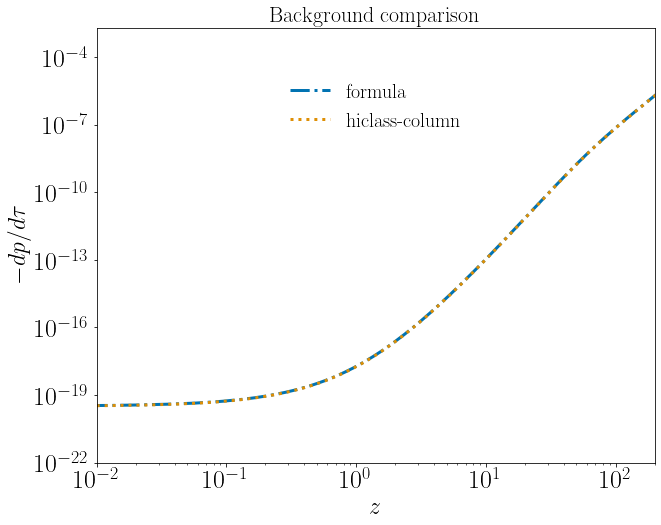

In [91]:
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)


#### Computing it through derivative of p
f_h = data['hiclass']['bg']
H0 = f_h[-1:,3];
p = f_h[:,20];
tau = f_h[:,2];
a_h = 1./(1.+f_h[:,0]);

dpdtau = (p - np.roll(p,1))/(tau - np.roll(tau,1));
axs.plot(f_h[:,0], -dpdtau,"-.",color =Colors[0], lw=3,label="formula")

#####
p_prime = f_h[:,22]
axs.plot(f_h[:,0], -p_prime,":",color =Colors[1], lw=3,label="hiclass-column")


axs.set_ylabel(r"$-dp/d \tau$",fontsize=24)
axs.set_xlabel('$z$',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlim(1.e-2,2.e2)
axs.set_ylim(1.e-22,2.e-3)

axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.5,0.82],loc="center",frameon=False)

## $\rho'$ test

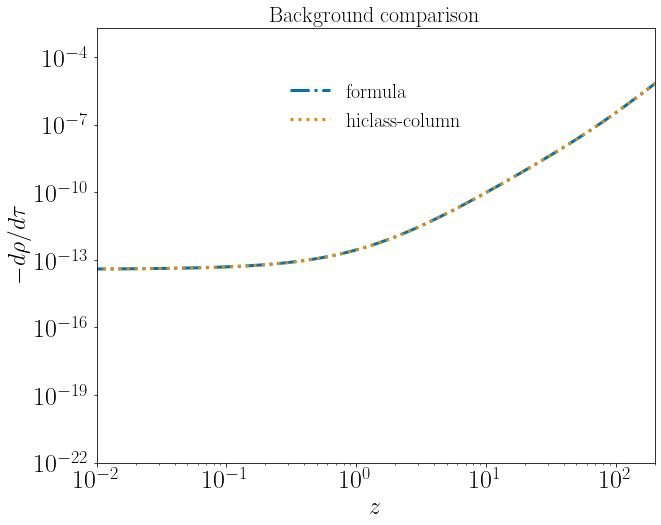

In [93]:
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)


#### Computing it through derivative of p
f_h = data['hiclass']['bg']
H0 = f_h[-1:,3];
rho = f_h[:,19];
tau = f_h[:,2];
a_h = 1./(1.+f_h[:,0]);

drhodtau = (rho - np.roll(rho,1))/(tau - np.roll(tau,1));
axs.plot(f_h[:,0], -drhodtau,"-.",color =Colors[0], lw=3,label="formula")

#####
rho_prime = f_h[:,21]
axs.plot(f_h[:,0], -rho_prime,":",color =Colors[1], lw=3,label="hiclass-column")


axs.set_ylabel(r"$-d \rho/d \tau$",fontsize=24)
axs.set_xlabel('$z$',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlim(1.e-2,2.e2)
axs.set_ylim(1.e-22,2.e-3)

axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.5,0.82],loc="center",frameon=False)

## $w'$ test

###### $w' = \frac{d w}{d \tau}$ is one of computing $w'$ and the other way is through $w'=-3 \mathcal{H} (1+w) (c_a^2 -w))$ and these two should match!

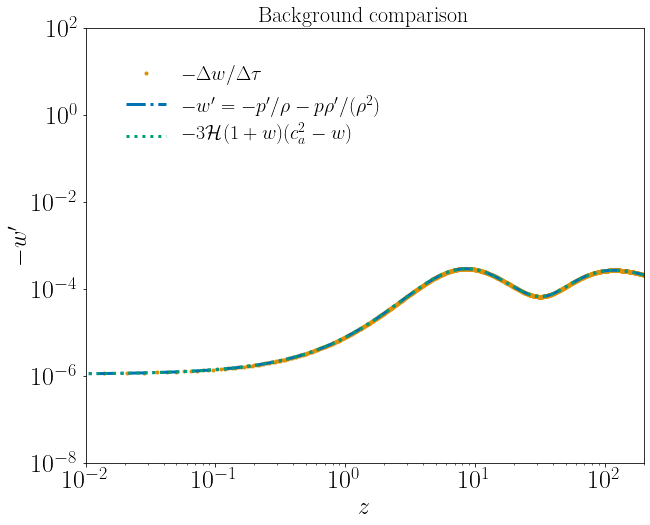

In [122]:
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)

f_h = data['hiclass']['bg']
w_list = f_h[:,20]/f_h[:,19];
H0 = f_h[-1:,3];

tau = f_h[:,2] # we use column 3:conf. time [Mpc]
# a_h = 1./(1.+f_h[:,0]);
dwdtau = (w_list - np.roll(w_list,1))/(tau - np.roll(tau,1));
axs.plot(f_h[:,0],-dwdtau,".",color =Colors[l+1], lw=3,label=r"$-\Delta w/\Delta \tau$")

#######
tau = f_h[:,1] # we use column 3:conf. time [Mpc]
# a_h = 1./(1.+f_h[:,0]);
p = f_h[:,20];
rho = f_h[:,19];
p_prime = f_h[:,22]
rho_prime = f_h[:,21];
w_prime = p_prime/rho - p*rho_prime/(rho*rho)
axs.plot(f_h[:,0],-w_prime,"-.",color =Colors[0], lw=3,label=r"$-w' = -p'/\rho - p \rho'/(\rho^2)$")


#### Computing it through 
# w' = -3 \mathcal{H} (1+w) (c_a^2 -w)
f_h = data['hiclass']['bg'];
a_h = 1./(1.+f_h[:,0]);
H_conf = f_h[:,3]*a_h;
w_list = f_h[:,20]/f_h[:,19];
ca2= f_h[:,22]/f_h[:,21];
H0 = f_h[-1:,3];

w_prime = -3. * (H_conf) * (1.+ w_list) * (ca2 - w_list);
axs.plot(f_h[:,0], -w_prime,":",color =Colors[l+2], lw=3,label=r"$-3 \mathcal{H} (1+w) (c_a^2 -w)$")



axs.set_ylabel(r"$-w'$",fontsize=24)
axs.set_xlabel('$z$',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlim(1.e-2,2.e2)
axs.set_ylim(1.e-8,1.e2)

axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.3,0.82],loc="center",frameon=False)

## $c_a^2$ contributions

######  $c_a^2 = \frac{-w'}{3 \mathcal{H} (1+w)} +w $ we plot the two contrubition

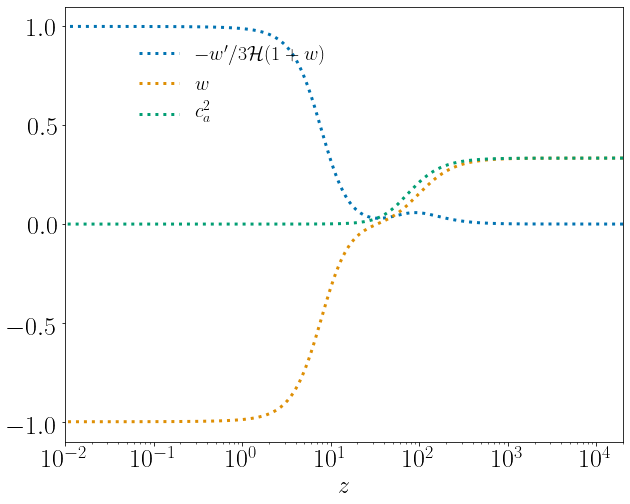

In [131]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10,8),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)

###################
f_h = data['hiclass']['bg'];
a_h = 1./(1.+f_h[:,0]);
H_conf = f_h[:,3]*a_h;
w_list = f_h[:,20]/f_h[:,19];
ca2= f_h[:,22]/f_h[:,21];
H0 = f_h[-1:,3];
w_prime = -3. * (H_conf) * (1.+ w_list) * (ca2 - w_list);
axs.plot(f_h[:,0],-w_prime/(3.*H_conf*(1.+w_list)),":",color =Colors[0], lw=3,label=r"$-w'/3\mathcal{H}(1+w)$")
axs.plot(f_h[:,0],w,":",color =Colors[1], lw=3,label=r"$w$")


###################
f_h = data['hiclass']['bg']
a_h = 1./(1.+f_h[:,0]);
axs.plot(f_h[:,0],f_h[:,22]/f_h[:,21],":",color =Colors[2], lw=3,label=r"$c_a^2$")


# axs.set_ylabel(r"$-w'$",fontsize=24)
axs.set_xlabel('$z$',fontsize=24)
axs.set_xscale('log')
# axs.set_yscale('log')
axs.set_xlim(1.e-2,2.e4)
# axs.set_ylim(1.e-8,1.e2)
axs.legend(fontsize=20,bbox_to_anchor=[0.3,0.82],loc="center",frameon=False)

# Matter power spectrum CHECK

In [ ]:
# types = 'kev_hiclass'
# for kind in ['phi','delta', 'B', 'pi_k', 'zeta', 'delta_kess']:
       
#     data[types]['bg'] =np.loadtxt(address+"/file_background.dat")
#     for i in range(np.shape(redshifts)[0]):
#         z = str(redshifts[i])
#         data[types][kind][z] = np.loadtxt(address+"/pk_"+str(i).zfill(3)+"_"+kind+".dat")

# #########        
# # hiclass        
# #########
# address_h = "./../../hi_class_pub_devel/output/"
# data['hiclass']['bg'] = np.loadtxt(address_h+"kessence_power00_background.dat")

# for i in range(np.shape(redshifts)[0]):
#     z = str(redshifts[i]);
#     data['hiclass']["tk"][z] = np.loadtxt(address_h+"kessence_power00_z"+str(i+1)+"_pk.dat")
#     data['hiclass']["pk"][z]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Attempting to set identical left == right == 0.1 results in singular transformations; automatically expanding.


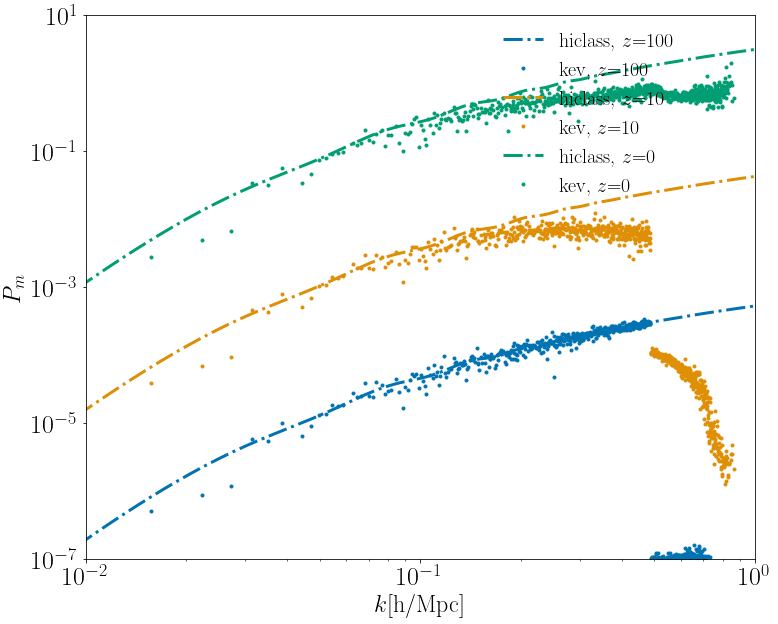

In [156]:
# plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(12,10),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)

# Normlization=As*(data['hiclass']['tk']['100'][:,0]/kp)**(ns-1.);

lines = ["o","-","*",".-"]
types = 'kev_hiclass'
l=0
for z in ["100","10","0"]:
    f_hi =  data['hiclass']["pk"][z];
    k_h =f_hi[:,0];
    pm= f_hi[:,1]*k_h**3/2./np.pi**2
    axs.loglog(k_h, pm,"-.",color =Colors[l], lw=3,label=correct_label("hiclass, $z$="+z))

    for kind in ['delta']:
        for types in ['kev_hiclass']:

            file = data[types][kind][z]
            axs.loglog(file[:,0],file[:,1],".",color =Colors[l], lw=3,label=correct_label("kev, $z$="+z))
            l=l+1
# hiclass
axs.set_ylabel(r'$P_m$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(1.e-7,1.e1)
axs.set_xlim(1.e-1,1.e-1)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[0].set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


# Potential power spectrum

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Attempting to set identical left == right == 0.1 results in singular transformations; automatically expanding.


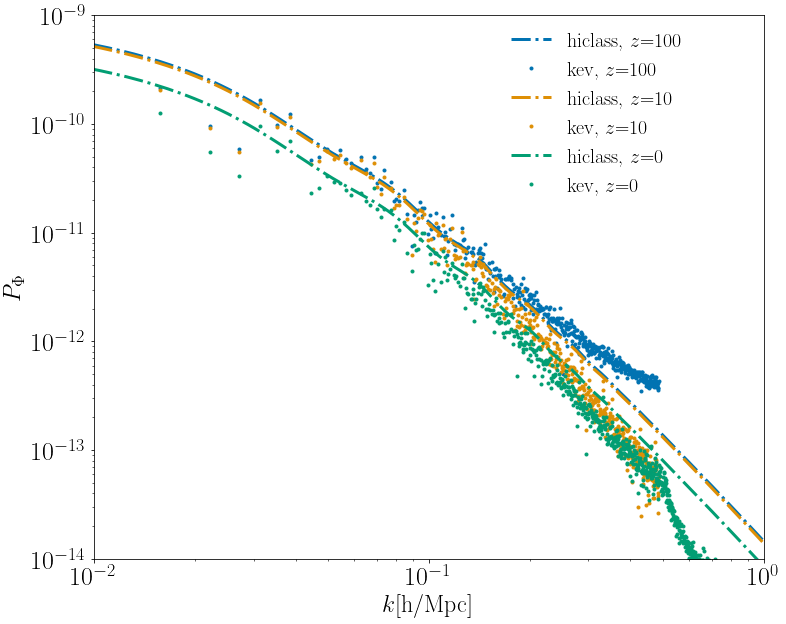

In [159]:
# plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(12,10),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)

Normlization=As*(data['hiclass']['tk']['100'][:,0]/kp)**(ns-1.);

lines = ["o","-","*",".-"]
types = 'kev_hiclass'
l=0
for z in ["100","10","0"]:
    f_hi =  data['hiclass']["tk"][z];
    k_h =  f_hi[:,0];
    power =  f_hi[:,8]**2*Normlization;

    axs.loglog(k_h, power,"-.",color =Colors[l], lw=3,label=correct_label("hiclass, $z$="+z))

    for kind in ['phi']:
        for types in ['kev_hiclass']:

            file = data[types][kind][z]
            axs.loglog(file[:,0],file[:,1],".",color =Colors[l], lw=3,label=correct_label("kev, $z$="+z))
            l=l+1
# hiclass
axs.set_ylabel(r'$P_{\Phi}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(1.e-14,1.e-9)
axs.set_xlim(1.e-1,1.e-1)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[0].set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


# B power spectrum

In [127]:
# # plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}
# matplotlib.rc('font', **font)
# fig, axs = plt.subplots(figsize=(15,20),nrows=2, ncols=1)
# plt.subplots_adjust(hspace=0.09)

# Normlization=As*(data['class']['tk']['cs2em4']['100'][:,0]/kp)**(ns-1.);

# lines = ["o","-","*",".-"]
# l=0
# lc=0
# for z in ["100","10","0"]:
#     l=0
#     for speed in ['cs2em4']:
#         for kind in ['B']:
# #             lc=0

# #             for types in ['kev_hiclass','kev_class','kev_file']:
# #             for kind in ['phi','delta', 'B', 'pi_k', 'zeta', 'delta_kess']:
#             for types in ['kev_hiclass','kev_class']:

#                 file = data[types][speed][kind][z]
#                 axs[0].loglog(file[:,0],file[:,1],lines[l],color =Colors[lc], lw=3,label=correct_label(kind+", "+types+", "+speed+", "+z))
            
#                 l=l+1
#             lc=lc+1
            
# axs[0].set_ylabel(r'$P$',fontsize=24)
# axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# axs[0].set_xscale('log')
# axs[0].set_yscale('log')
# axs[0].set_ylim(1.e-20,1.e-15)
# axs[0].set_xlim(1.e-1,1.e-1)
# # axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# # axs[0].set_title("Background comparison", fontsize=22)
# axs[0].legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


# lines = ["o","-","*",".-"]
# l=0
# lc=0
# for z in ["100","50","20","10","1","0"]:
#     for speed in ['cs2em4']:
#         for kind in ['B']:
# #             lc=0
#             for types in ['kev_hiclass']:
                
#                 file_base=data['kev_class'][speed][kind][z]
#                 file = data[types][speed][kind][z]
#                 axs[1].plot(file[:,0],np.abs(file[:,1]/file_base[:,1]-1),"-",color =Colors[lc], lw=3,label=correct_label(kind+", "+types+", "+speed+", "+z))
#                 l=l+1
#                 lc=lc+1

# axs[1].set_ylabel(r'$\Delta P(k)/P$',fontsize=24)
# axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
# axs[1].set_xscale('log')
# axs[1].set_yscale('log')
# # axs[1].set_ylim(1.e-16,10)
# axs[1].set_xlim(1.e-2,1.e0)
# # axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# # axs[1].set_title("Background comparison", fontsize=22)
# axs[1].legend(fontsize=20,bbox_to_anchor=[0.65,0.22],loc="center",frameon=False)


# delta kess

In [128]:
# # plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}
# matplotlib.rc('font', **font)
# fig, axs = plt.subplots(figsize=(12,10),nrows=1, ncols=1)
# plt.subplots_adjust(hspace=0.09)

# Normlization=As*(data['hiclass']['tk']['100'][:,0]/kp)**(ns-1.);

# lines = ["o","-","*",".-"]
# types = 'kev_hiclass'
# l=0
# for z in ["100","10","0"]:
#     f_hi =  data['hiclass']["tk"][z];
#     k_h =  f_hi[:,0];
#     power =  f_hi[:,8]**2*Normlization;

#     axs.loglog(k_h, power,"-.",color =Colors[l], lw=3,label=correct_label("hiclass, $z$="+z))

#     for kind in ['phi']:
#         for types in ['kev_hiclass']:

#             file = data[types][kind][z]
#             axs.loglog(file[:,0],file[:,1],".",color =Colors[l], lw=3,label=correct_label("kev, $z$="+z))
#             l=l+1
# # hiclass
# axs.set_ylabel(r'$P$',fontsize=24)
# axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
# axs.set_xscale('log')
# axs.set_yscale('log')
# axs.set_ylim(1.e-14,1.e-9)
# axs.set_xlim(1.e-1,1.e-1)
# # axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# # axs[0].set_title("Background comparison", fontsize=22)
# axs.legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


# pi_k power spectrum

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Attempting to set identical left == right == 0.1 results in singular transformations; automatically expanding.


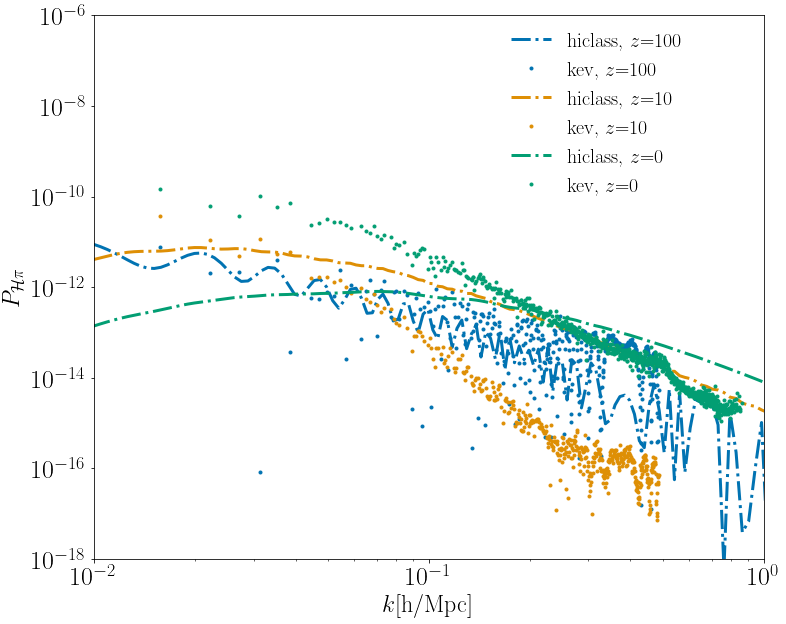

In [158]:
# plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(12,10),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)

Normlization=As*(data['hiclass']['tk']['100'][:,0]/kp)**(ns-1.);

lines = ["o","-","*",".-"]
types = 'kev_hiclass'
l=0
for z in ["100","10","0"]:
    f_hi =  data['hiclass']["tk"][z];
    k_h =  f_hi[:,0];
    power =  f_hi[:,5]**2*data['hiclass']['bg'][-1:,3]**2*Normlization;

    axs.loglog(k_h, power,"-.",color =Colors[l], lw=3,label=correct_label("hiclass, $z$="+z))

    for kind in ['pi_k']:
        for types in ['kev_hiclass']:

            file = data[types][kind][z]
            axs.loglog(file[:,0],file[:,1],".",color =Colors[l], lw=3,label=correct_label("kev, $z$="+z))
            l=l+1
# hiclass
axs.set_ylabel(r'$P_{\mathcal{H}\pi}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(1.e-18,1.e-6)
axs.set_xlim(1.e-1,1.e-1)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[0].set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


# zeta power

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Attempting to set identical left == right == 0.1 results in singular transformations; automatically expanding.


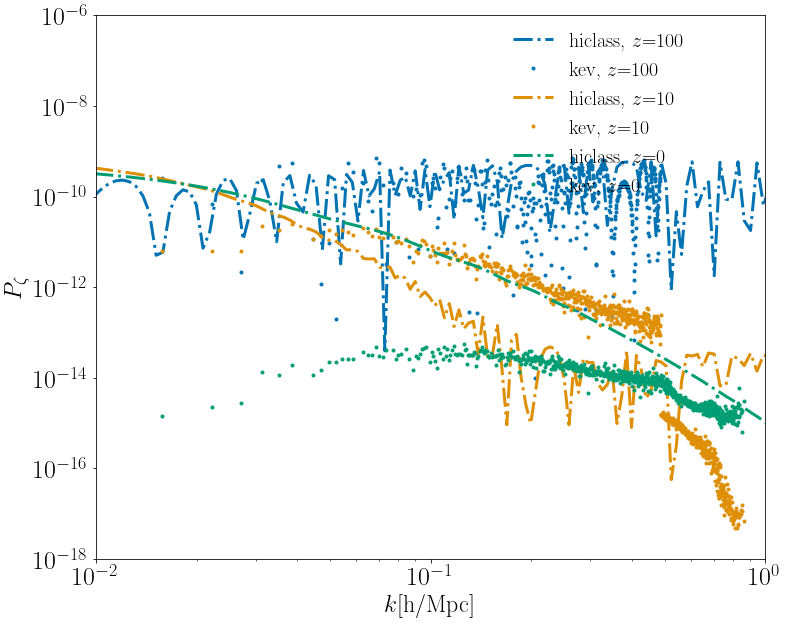

In [157]:
# plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(12,10),nrows=1, ncols=1)
plt.subplots_adjust(hspace=0.09)

Normlization=As*(data['hiclass']['tk']['100'][:,0]/kp)**(ns-1.);

lines = ["o","-","*",".-"]
types = 'kev_hiclass'
l=0
for z in ["100","10","0"]:
    bg = data['hiclass']['bg']
    a_h = 1./(1.+bg[:,0]);
    Hconf_hi = interpolate.interp1d(f_h[:,0],(a_h*bg[:,3]),fill_value='extrapolate')
    ####
    f_hi =  data['hiclass']["tk"][z];
    k_h =  f_hi[:,0];
    zeta = f_hi[:,6] + f_hi[:,5] * Hconf_hi(int(z)) -  f_hi[:,9] # zeta = pi' + H_conf pi - psi
    power =  zeta**2*Normlization;

    axs.loglog(k_h, power,"-.",color =Colors[l], lw=3,label=correct_label("hiclass, $z$="+z))

    for kind in ['zeta']:
        for types in ['kev_hiclass']:

            file = data[types][kind][z]
            axs.loglog(file[:,0],file[:,1],".",color =Colors[l], lw=3,label=correct_label("kev, $z$="+z))
            l=l+1
# hiclass
axs.set_ylabel(r'$P_{\zeta}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(1.e-18,1.e-6)
axs.set_xlim(1.e-1,1.e-1)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[0].set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


## Numerical check

In [ ]:
# kind = 'pow_zeta'
# for redshift in redshifts:

# #     k = data['gev'][kind]['z='+str(redshift)] [:,0]
# #     file_gev = data['gev'][kind]['z='+str(redshift)] [:,1]
#     # axs[1].loglog(file[:,2],file[:,3],"-",color =Colors[l], lw=3,label="gevolution")

#     file_kev = data['kev'][kind]['z='+str(redshift)][:,1]
#     axs[1].plot(k,np.abs(file_kev-file_gev)/file_gev,"-",color =Colors[l+1], lw=3,label="kevolution vs gevolution")

#     file_kev_old = data['kev_old'][kind]['z='+str(redshift)][:,1]
    
# #     print("At z:"+ str(redshifts[i]) + "\n kevolution vs gevolution max of relative error: " +  str(np.max(file_kev-file_gev )) + " \n kevolution_old vs gevolution max of relative error: " + np.max(file_kev_old-file_gev ) + " \n kevolution_old vs kevolution max of relative error: " + np.max(file_kev_old-file_kev ) )
#     max_kev_gev = np.max(np.abs(file_kev-file_gev )/file_gev)
#     max_kev_old_gev = np.max(np.abs(file_kev_old-file_gev )/file_gev)
#     max_kev_old_kev = np.max(np.abs(file_kev_old-file_kev )/file_kev)

#     print("At z:"+ str(redshift) + " \n kevolution_old vs kevolution max of relative error: " + str(max_kev_old_kev)  + " at k=" + str(k[where(np.abs(file_kev_old-file_kev )/file_kev == max_kev_old_kev)]))
    
